# Part 03 - Calculating $\pi$

We often take constants such as $\pi$ and functions such as $\sin$ and $\log$ for granted. We have them in our calculators and computers, but if we were stuck in the wilderness, trying to triangulate our position or solve a tricky math problem to impress the natives, could we recreate them with just basic multiplication, addition, and subtraction?

Here we're going to try to calculate $\pi$. We assume we can create random numbers (maybe by dropping stones at random on a grid, or rolling a dice, or flipping a coin), and multiply, but that's it!

We need some simple system that contains $\pi$. To that end, consider a circle of radius 1 centered within a square of length 2, centered about the origin,

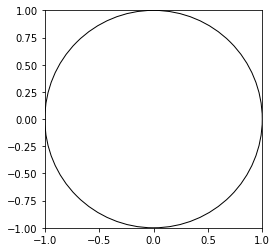

In [1]:
import pylab #Get our plotting library loaded
axis = pylab.gca() #Get the Current Axis (GCA) of the current figure
axis.add_artist(pylab.Circle((0,0),1, fill=False)) #Draw a circle at 0,0 with radius 1
axis.set_aspect('equal', 'box') # Give us a nice square plot
pylab.xlim(-1,1) # set the limits of the plot to exactly around the circle
pylab.ylim(-1,1) # ...
pylab.show()

If we generate two random numbers between [-1,+1], and use them as coordinates on the graph above, what is the probability it will land in the circle?

This is just the ratio of the area of the circle, $\pi\,r^2$, to the area of the square, $2^2=4$,
$$P = \frac{\pi}{4}$$

How can we work out if a point is inside the circle or not? Well, the equation of a circle is as follows:
$$R^2 = x^2+y^2$$
For the point to be inside the circle we must have:
$$x^2+y^2 < R^2$$

So our algorithm is clear:

1. Generate a pair of random numbers, $x\in[-1,+1]$ and $y\in[-1,+1]$.
2. if $x^2+y^2 < R^2$, then increment our counter for how many landed in, $N_{in}$.
3. Always increment the number of tries $N_{tru}$.
4. Calculate the new estimate of $\pi$ as $4\,N_{in}/N_{try}$.
5. If the maximum number of samples has been reached, then stop, otherwise goto 1.

Try implementing this yourself below!

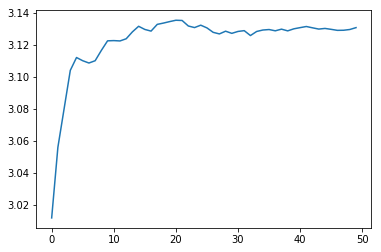

In [3]:
import random

def circle_drop_test():
    x = random.uniform(-1,1)
    y = random.uniform(-1,1)
    return x**2 + y**2 < 1

def piCalc(ntests):
    counter=0
    for i in range(ntests):
        if circle_drop_test():
            counter += 1
    return 4 * counter / ntests

results=[]
running_sum=0
counter=0
for i in range(50):
    running_sum += piCalc(1000)
    counter += 1
    results.append(running_sum / counter)

%matplotlib inline
pylab.plot(results)

## Extra credit

1. Do we need to generate pairs in the range $[-1,1]$. Is there any symmetry we can use to generate them in a smaller range?
2. Plot the convergence of the estimate towards $\pi$ every 1k samples, how fast is it converging?
3. Restart the calculations repeatedly to get the standard deviation in the value of $\pi$ after every 1k samples. How fast does the standard deviation reduce with the sample count?
4. Do we need random numbers? Adapt the code to use a regular grid and compare.
5. This is actually a Monte Carlo integration of the following integral $$ \frac{\pi}{4}=\frac{\iint_{-1}^{+1} \Theta\left(1-x^2-y^2\right) {\rm d}x\,{\rm d}y}{\iint_{-1}^{+1}{\rm d}x\,{\rm d}y}$$ where the bottom integral is just the area of the square (4). This is an example of how Monte Carlo integration using random numbers can solve quite difficult integrals, and Monte Carlo will be covered later in the main course.

# Part 3 redux - Generating fractional random numbers

How does a computer generate random numbers? Wait, scratch that, its complicated and covered later in the main course. Lets assume a computer can generate a single random bit (0 or 1) at a time by flipping a coin. How do we generate fractional random numbers?  
The Han-Hoshi algorithm works by successively splitting an interval in half, then flipping a coin to decide which half to take. 

Lets take a look at a working example that generates values between 0 and 1:

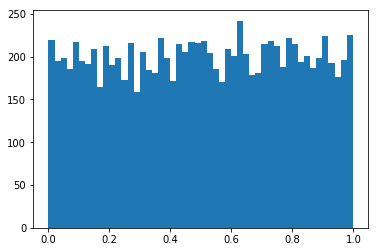

In [4]:
import random

def flip_a_coin():
    return random.randint(0,1) == 1

def random_01():
    value = 0
    for idx in range(1,10):
        if flip_a_coin() == True:
            value += 1.0 / (2**idx)
    return value

# Make a histogram of the values to see if they're evenly distributed over the range
random_nums = []
for count in range(0, 10000):
    random_nums.append(random_01())
    
import pylab
pylab.hist(random_nums, 50)
pylab.show()

## Extra credit

- Try to rewrite the function to generate values in any range.
- Significantly more challenging, try to generate random directions (unit vectors) and plot these in 3D to ensure that they cover the surface of a sphere evenly. Its expected that you will google the answer but write your own code and try to understand it!